In [3]:
#Importing geoplotlib
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
canada_prov = gpd.read_file('georef-canada-province.geojson')
canada_prov.dtypes

prov_type           object
prov_code           object
prov_name_fr        object
prov_name_en        object
year                object
prov_area_code      object
geometry          geometry
dtype: object

In [5]:
bmi = pd.read_csv("13100096.csv")
bmi

REF_DATE                             GEO        DGUID  \
0           2015  Canada (excluding territories)          NaN   
1           2015  Canada (excluding territories)          NaN   
2           2015  Canada (excluding territories)          NaN   
3           2015  Canada (excluding territories)          NaN   
4           2015  Canada (excluding territories)          NaN   
...          ...                             ...          ...   
225544      2020                British Columbia  2016A000259   
225545      2020                British Columbia  2016A000259   
225546      2020                British Columbia  2016A000259   
225547      2020                British Columbia  2016A000259   
225548      2020                British Columbia  2016A000259   

                       Age group         Sex  \
0       Total, 12 years and over  Both sexes   
1       Total, 12 years and over  Both sexes   
2       Total, 12 years and over  Both sexes   
3       Total, 12 years and over  Both sexes   
4       Total, 12 years and over  Both sexes   
...                          ...         ...   
225544         65 years and over     Females   
225545         65 years and over     Females   
225546         65 years and over     Females   
225547         65 years and over     Females   
225548         65 years and over     Females   

                                          Indicators  \
0           Perceived health, very good or excellent   
1           Perceived health, very good or excellent   
2           Perceived health, very good or excellent   
3           Perceived health, very good or excellent   
4           Perceived health, very good or excellent   
...                                              ...   
225544  Influenza immunization in the past 12 months   
225545  Influenza immunization in the past 12 months   
225546  Influenza immunization in the past 12 months   
225547  Influenza immunization in the past 12 months   
225548  Influenza immunization in the past 12 months   

                                          Characteristics      UOM  UOM_ID  \
0                                       Number of persons   Number     223   
1          Low 95% confidence interval, number of persons   Number     223   
2         High 95% confidence interval, number of persons   Number     223   
3                                                 Percent  Percent     239   
4                    Low 95% confidence interval, percent  Percent     239   
...                                                   ...      ...     ...   
225544                                            Percent  Percent     239   
225545               Low 95% confidence interval, percent  Percent     239   
225546              High 95% confidence interval, percent  Percent     239   
225547  Statistically different from the Canada (exclu...   Number     223   
225548  Statistically different from previous referenc...   Number     223   

       SCALAR_FACTOR  SCALAR_ID      VECTOR   COORDINATE       VALUE STATUS  \
0              units          0  v110787543    1.1.1.1.1  18759800.0    NaN   
1              units          0  v110787544    1.1.1.1.2  18556100.0    NaN   
2              units          0  v110787545    1.1.1.1.3  18963600.0    NaN   
3              units          0  v110787546    1.1.1.1.4        61.9    NaN   
4              units          0  v110787547    1.1.1.1.5        61.3    NaN   
...              ...        ...         ...          ...         ...    ...   
225544         units          0  v123342190  11.6.3.27.4        68.2    NaN   
225545         units          0  v123342191  11.6.3.27.5        64.8    NaN   
225546         units          0  v123342192  11.6.3.27.6        71.4    NaN   
225547         units          0  v123342193  11.6.3.27.7         0.0    NaN   
225548         units          0  v123342194  11.6.3.27.8         0.0    NaN   

        SYMBOL  TERMINATED  DECIMALS  
0          NaN         NaN         0  
1          Na

In [6]:
bmi = pd.read_csv("13100096.csv")
bmi = bmi.loc[bmi['REF_DATE'] == 2020]
bmi = bmi.loc[(bmi['GEO'] == "Alberta")|
              (bmi['GEO'] == "British Columbia")|
              (bmi['GEO'] == "Saskatchewan")|
              (bmi['GEO'] == "Manitoba")|
              (bmi['GEO'] == "Ontario")|
              (bmi['GEO'] == "Quebec")|
              (bmi['GEO'] == "New Brunswick")|
              (bmi['GEO'] == "Nova Scotia")|
              (bmi['GEO'] == "Newfoundland and Labrador")]

bmi = bmi.loc[(bmi['Sex'] == "Males")|
              (bmi['Sex'] == "Females")]

bmi = bmi.loc[(bmi['Indicators'] == "Body mass index, adjusted self-reported, adult (18 years and over), obese")]

bmi = bmi.loc[(bmi['Age group'] == "Total, 12 years and over")]

bmi = bmi.loc[(bmi['Characteristics'] == "Percent")]

#create a male df
male_bmi = bmi.loc[(bmi['Sex'] == "Males")]
male_bmi = male_bmi[['GEO','VALUE']]
male_bmi = male_bmi.rename(columns={"VALUE": "VALUE_male"})

#create a female df
female_bmi = bmi.loc[(bmi['Sex'] == "Females")]
female_bmi = female_bmi[['VALUE']]
female_bmi = female_bmi.rename(columns={"VALUE": "VALUE_female"})

male_bmi.reset_index(drop=True, inplace=True)
female_bmi.reset_index(drop=True, inplace=True)
merged_df = pd.concat([male_bmi, female_bmi], axis=1)
merged_df["ratio"] = 1-(merged_df["VALUE_male"]/merged_df["VALUE_female"])
merged_df = merged_df.rename(columns={"GEO": "prov_name_en"})
merged_df

prov_name_en  VALUE_male  VALUE_female     ratio
0  Newfoundland and Labrador        41.7          42.0  0.007143
1                Nova Scotia        36.3          35.4 -0.025424
2              New Brunswick        33.8          41.7  0.189448
3                     Quebec        26.4          26.2 -0.007634
4                    Ontario        28.5          28.4 -0.003521
5                   Manitoba        27.8          32.7  0.149847
6               Saskatchewan        35.6          31.8 -0.119497
7                    Alberta        31.4          27.9 -0.125448
8           British Columbia        24.8          22.3 -0.112108

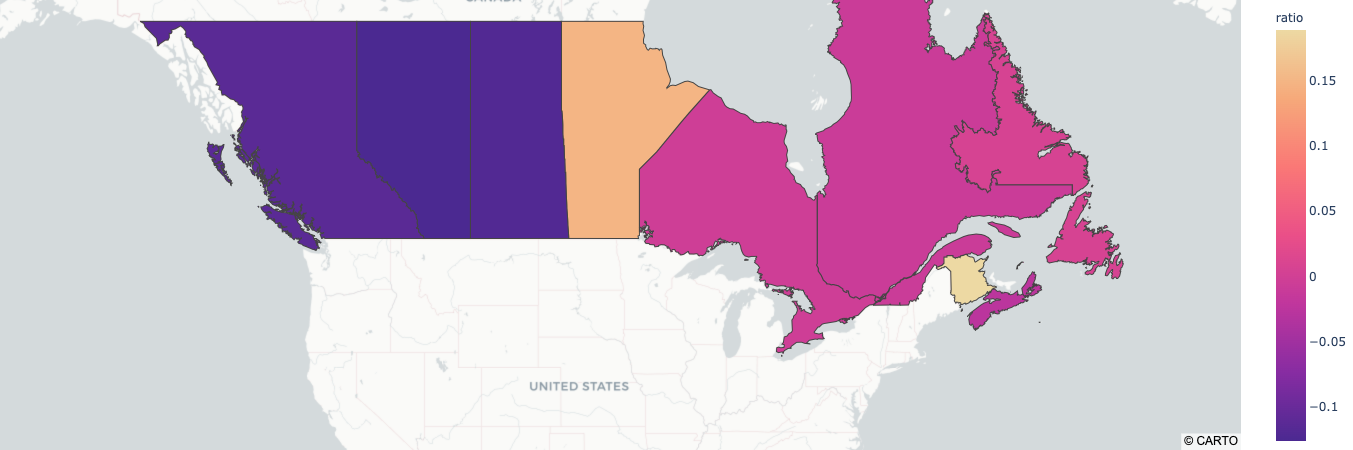

In [8]:
#plot choropleth
fig = px.choropleth_mapbox(merged_df,
                           geojson=canada_prov,
                           color="ratio",
                           locations="prov_name_en",
                           hover_name="ratio",
                           featureidkey="properties.prov_name_en",
                           center=dict(lat=49.7713, lon=-96.8165),
                           zoom=3,
                           color_continuous_scale="agsunset")

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0}, mapbox_style='carto-positron')

fig.show()